## 1.导入依赖包

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dense, Flatten, Dropout, MaxPool2D

## 2.导入数据集

In [2]:
train = pd.read_csv('../../data/fashion_train.csv')
test = pd.read_csv('../../data/fashion_test.csv')
print(train.shape, test.shape)

(42000, 785) (28000, 784)


## 3.数据预处理

### 3.1读取训练集和验证集

In [3]:
input_shape = (28, 28, 1)
x = np.array(train.iloc[:, 1:])
y = keras.utils.to_categorical(np.array(train.iloc[:, 0]))
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)

(33600, 784) (33600, 10)


### 3.2修改数据维度

In [4]:
x_test = np.array(test.iloc[:, 0:])
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape, y_train.shape)

(33600, 28, 28, 1) (33600, 10)


### 3.3数据归一化

In [5]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

batch_size = 64
classes = 10
epochs = 5

## 4.建立模型

In [6]:
model = keras.models.Sequential([
    Conv2D(filters=96, kernel_size=(3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),

    Conv2D(filters=256, kernel_size=(3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),

    Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),

    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])

## 5.定义优化器、损失函数和评价指标

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 6.设置断点续训

In [8]:
save_path = './checkpoint/AlexNet.ckpt'
if os.path.exists(save_path + '.index'):
    print('model loading')
    model.load_weights(save_path)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=save_path,
                                              save_weights_only=True,
                                              save_best_only=True)

## 7.训练模型

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=[cp_callback])

Epoch 1/5
525/525 [==============================] - 165s 315ms/step - loss: 0.6482 - accuracy: 0.7658 - val_loss: 0.6376 - val_accuracy: 0.7770
Epoch 2/5
525/525 [==============================] - 164s 313ms/step - loss: 0.4299 - accuracy: 0.8497 - val_loss: 0.4027 - val_accuracy: 0.8530
Epoch 3/5
525/525 [==============================] - 166s 316ms/step - loss: 0.3637 - accuracy: 0.8708 - val_loss: 0.4309 - val_accuracy: 0.8530
Epoch 4/5
525/525 [==============================] - 205s 390ms/step - loss: 0.3360 - accuracy: 0.8794 - val_loss: 0.4039 - val_accuracy: 0.8701
Epoch 5/5
525/525 [==============================] - 183s 349ms/step - loss: 0.3078 - accuracy: 0.8904 - val_loss: 0.3430 - val_accuracy: 0.8843


## 8.将预测结果写入csv文件

In [10]:
result = model.predict(x_test)
pred = tf.argmax(result, axis=1)
df = pd.DataFrame(pred, columns=['label'])
df.to_csv(path_or_buf='Submission.csv', index_label='image_id')

## 9.模型损失和准确率可视化

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


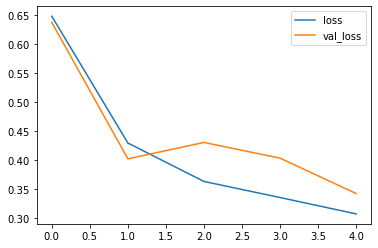

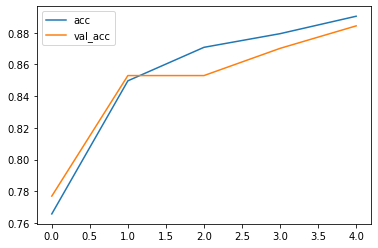

In [12]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()

plt.plot(history.epoch, history.history.get('accuracy'), label='acc')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_acc')
plt.legend()
plt.show()